In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 

In [2]:
def plot_turbines(points,ax = None):
    X = points[:,0]
    Y = points[:,1]
    if not ax:
        plt.figure(figsize = (10,8))
        plt.plot([50,3950,3950,50,50],[50,50,3950,3950,50],linestyle = '--',c = 'r')
        plt.scatter(X,Y,s = 100,marker = '*')
    else: 
        ax.plot([50,3950,3950,50,50],[50,50,3950,3950,50],linestyle = '--',c = 'r')
        ax.scatter(X,Y,s = 100,marker = '*')
    
def plot_turbines2(list_points,list_aep = None):
    l = len(list_points)
    fig,ax = plt.subplots(1,l,figsize = (20,8))
    for i,points in enumerate(list_points):
        plot_turbines(points,ax[i])
        if list_aep:
            ax[i].set_title('AEP is '+str(list_aep[i]))
#         print(points)

In [3]:
# upload the function from python file 
from Farm_Evaluator_Vec import find_aep

POWER_CURVE = 'power_curve.csv'
WIND_DATA = 'wind_data/wind_360_uniform.csv'
WIND_DATA_2007 = 'wind_data/wind_data_2007.csv'
WIND_DATA_2 = 'wind_data/wind_360_uniform_3.csv'
DATA1 = 'turbine_data/wake1.csv'
DATA2 = 'turbine_data/manual2.csv'

def find_aep_points(points):
    return find_aep(points,POWER_CURVE,WIND_DATA_2007)

def find_list_aep(list_points):
    list_aep = []
    for points in list_points:
        list_aep.append(find_aep_points(points))
    return list_aep

# Start with a single turbine

AEP is  0.0


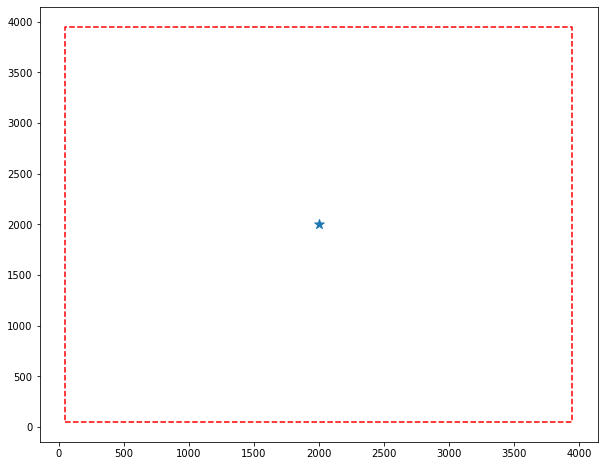

In [4]:
points = np.array([[2000,2000]])


aep = find_aep(points,POWER_CURVE,WIND_DATA_2)
print('AEP is ',aep)
plot_turbines(points)

In [5]:
points1 = np.array([[2000,2000],[50,2000]])
points2 = np.array([[2000,2000],[3950,2000]])
aep = find_list_aep([points1,points2])

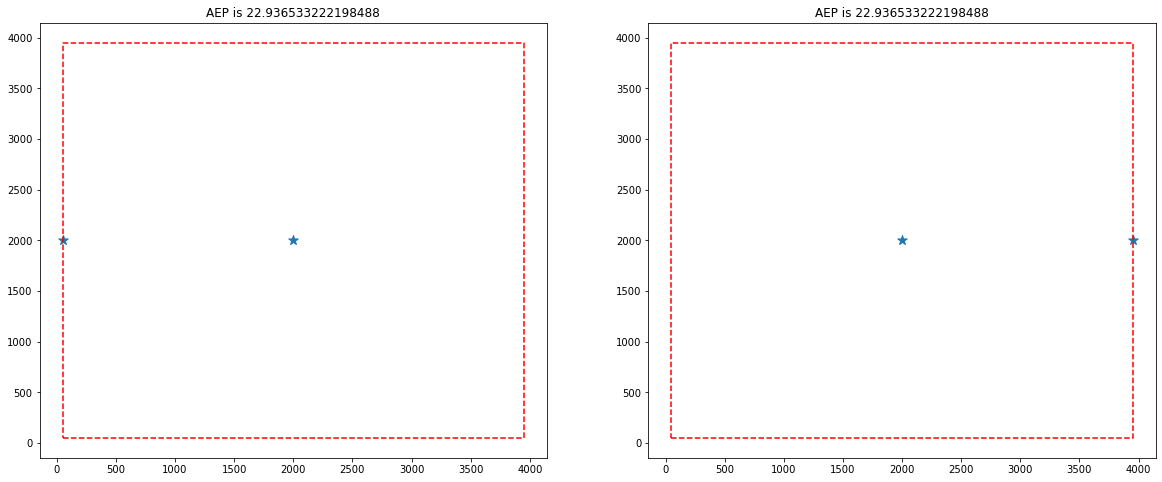

In [6]:
plot_turbines2([points1,points2],aep)

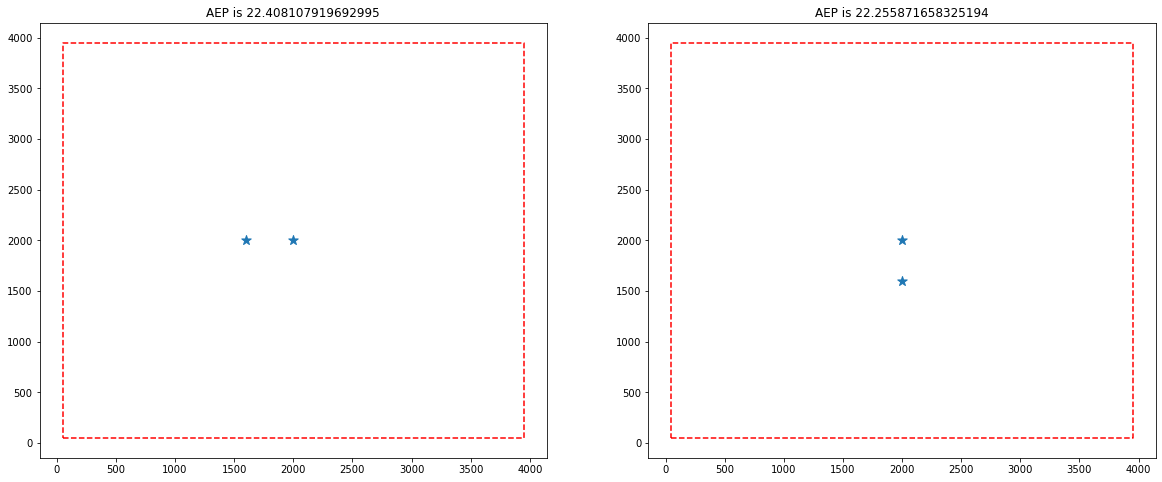

In [7]:
points1 = np.array([[2000,2000],[1600,2000]])
points2 = np.array([[2000,2000],[2000,1600]])
aep = find_list_aep([points1,points2])

plot_turbines2([points1,points2],aep)

# 3 turbines

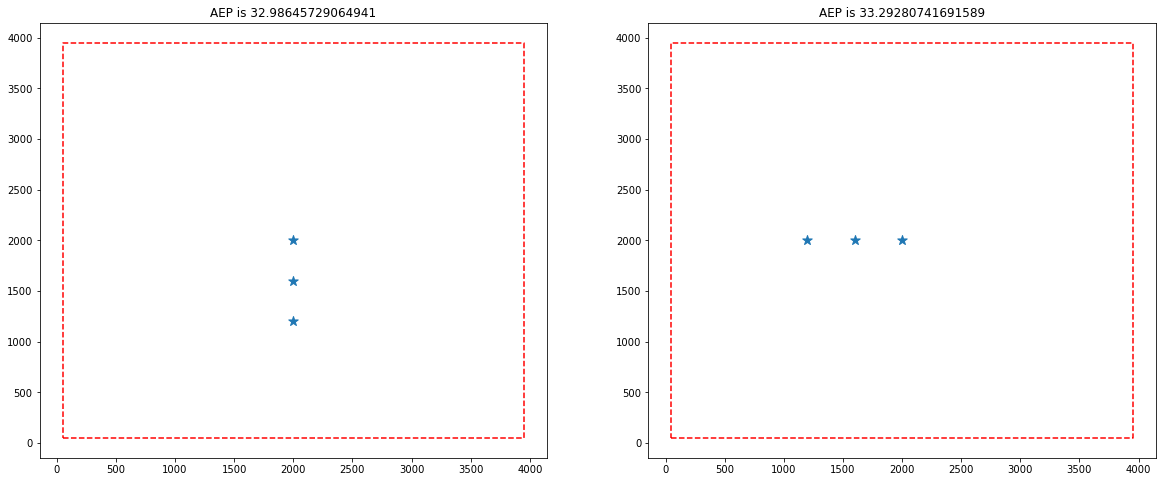

In [8]:
points1 = np.array([[2000,2000],[2000,1600],[2000,1200]])
points2 = np.array([[2000,2000],[1600,2000],[1200,2000]])
aep = find_list_aep([points1,points2])

plot_turbines2([points1,points2],aep)

# 4 turbines

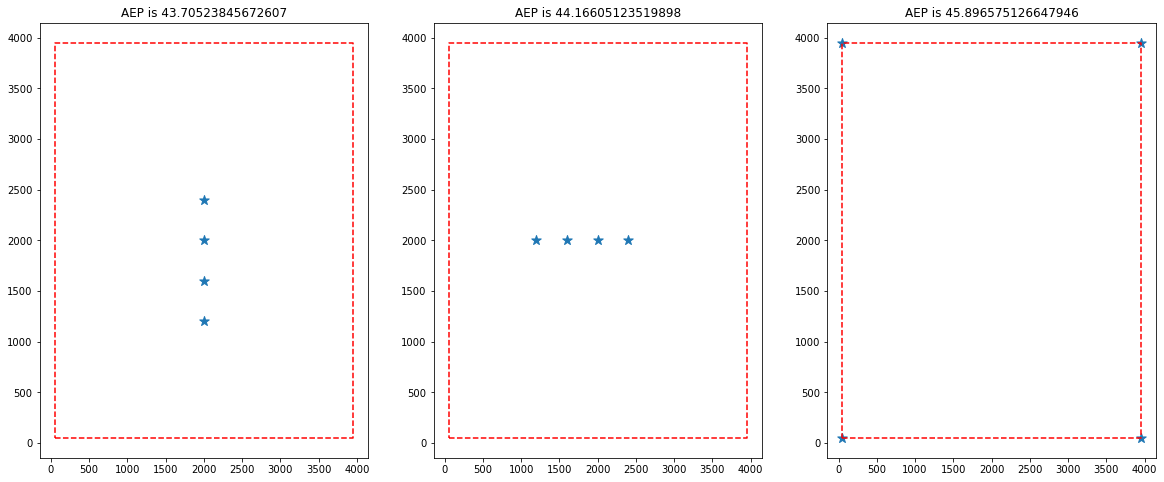

In [9]:
points1 = np.array([[2000,2000],[2000,1600],[2000,1200],[2000,2400]])
points2 = np.array([[2000,2000],[1600,2000],[1200,2000],[2400,2000]])
points3 = np.array([[50,3950],[50,50],[3950,50],[3950,3950]])
aep = find_list_aep([points1,points2,points3])

plot_turbines2([points1,points2,points3],aep)

In [16]:
df = pd.read_csv(WIND_DATA)
print(df.shape)
df.head()

(15548, 3)


,date,drct,sped
0,2007-01-01 00:20,360,20
1,2007-01-01 00:50,360,20
2,2007-01-01 01:20,360,20
3,2007-01-01 01:50,360,20
4,2007-01-01 02:20,360,20


In [17]:
df.describe()

,drct,sped
count,15548.0,15548.0
mean,360.0,20.0
std,0.0,0.0
min,360.0,20.0
25%,360.0,20.0
50%,360.0,20.0
75%,360.0,20.0
max,360.0,20.0


# GetTurbLoc

In [4]:
from Farm_Evaluator import getTurbLoc
array1 = getTurbLoc(DATA1)
array2 = getTurbLoc(DATA2)
print(array1.shape,array2.shape)

(50, 2) (50, 2)


# BindWindData

In [5]:
from Farm_Evaluator import binWindResourceData

prob_array = binWindResourceData(WIND_DATA)
print(type(prob_array))
print(prob_array.shape)

<class 'numpy.ndarray'>
(36, 15)


In [6]:
print(prob_array)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [7]:
prob_array_2007 = binWindResourceData(WIND_DATA_2007)
print(type(prob_array_2007))
print(prob_array_2007.shape)
print(prob_array_2007)

<class 'numpy.ndarray'>
(36, 15)
[[8.36120395e-04 4.50218655e-03 5.14535652e-03 3.66606633e-03
  2.63699517e-03 1.60792388e-03 7.71803432e-04 7.07486470e-04
  1.92950858e-04 6.43169551e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.09338819e-03 4.56650369e-03 4.24491894e-03 4.63082083e-03
  4.24491894e-03 1.92950864e-03 2.18677637e-03 1.28633913e-03
  4.50218678e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.09338819e-03 4.50218655e-03 6.11011079e-03 3.40879848e-03
  1.92950864e-03 2.05814256e-03 1.73655781e-03 4.50218678e-04
  4.50218678e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.64754319e-04 3.28016467e-03 4.30923607e-03 1.92950864e-03
  1.99382566e-03 7.07486470e-04 3.85901716e-04 1.28633910e-04
  6.43169551e-05 6.43169551e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.71803432e-04 3.73038324e-03

# Rotated Frame

In [8]:
from Farm_Evaluator import rotatedFrame

In [9]:
rotated_array1 = rotatedFrame(array1,90)
rotated_array2 = rotatedFrame(array2,90)
print(rotated_array1.shape,rotated_array2.shape)

(50, 2) (50, 2)


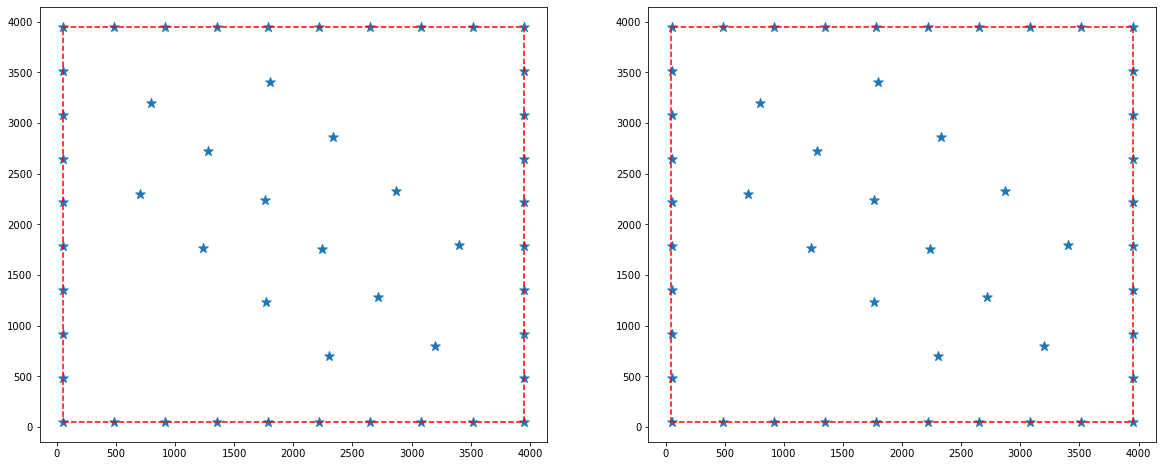

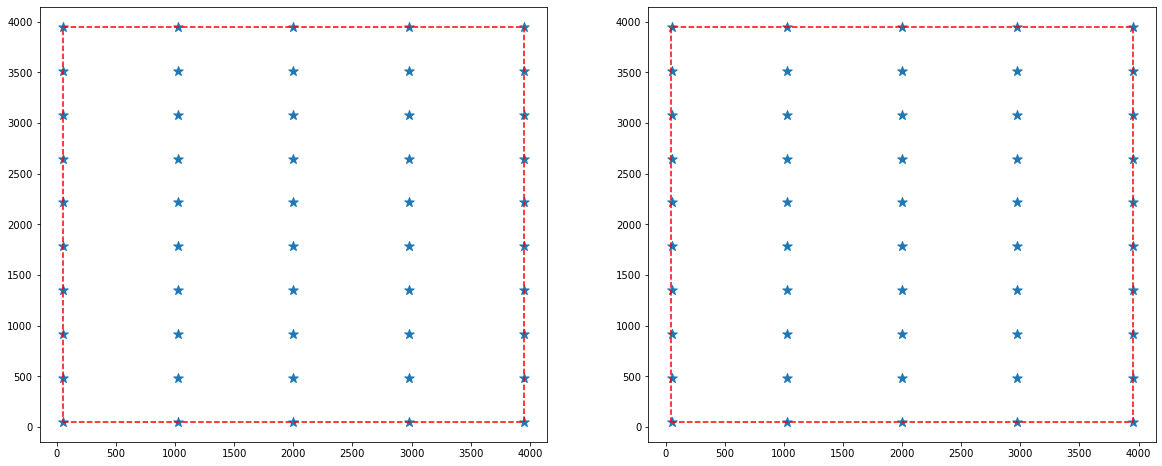

In [10]:
plot_turbines2([array1,rotated_array1])
plot_turbines2([array2,rotated_array2])

(50, 2) (50, 2)


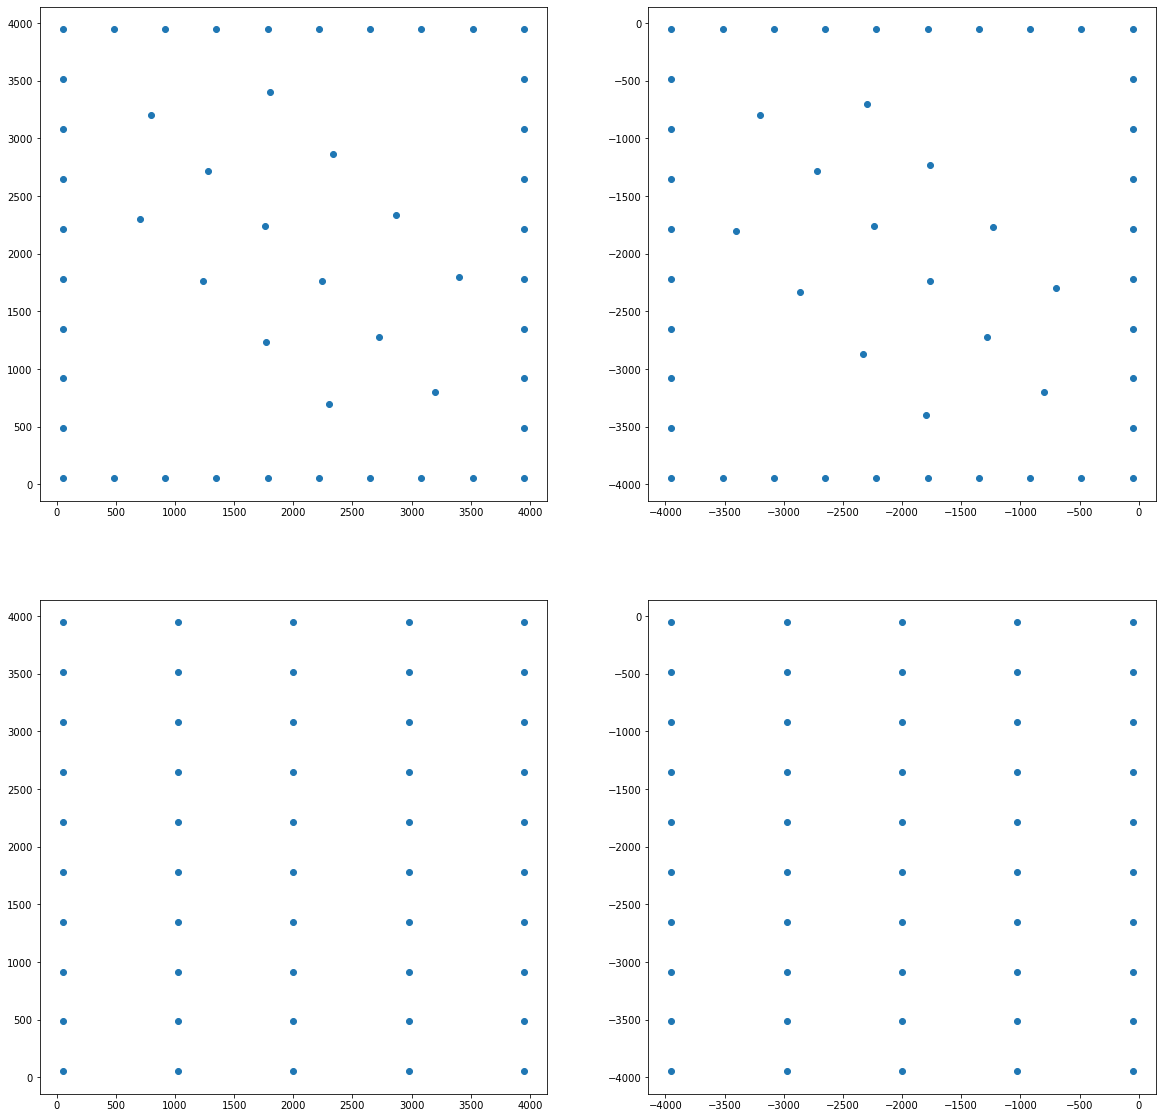

In [11]:
rotated_array1 = rotatedFrame(array1,270)
rotated_array2 = rotatedFrame(array2,270)
print(rotated_array1.shape,rotated_array2.shape)

fig,ax = plt.subplots(2,2,figsize = (20,20))
ax[0][0].scatter(array1[:,0],array1[:,1])
ax[0][1].scatter(rotated_array1[:,0],rotated_array1[:,1])
ax[1][0].scatter(array2[:,0],array2[:,1])
ax[1][1].scatter(rotated_array2[:,0],rotated_array2[:,1])


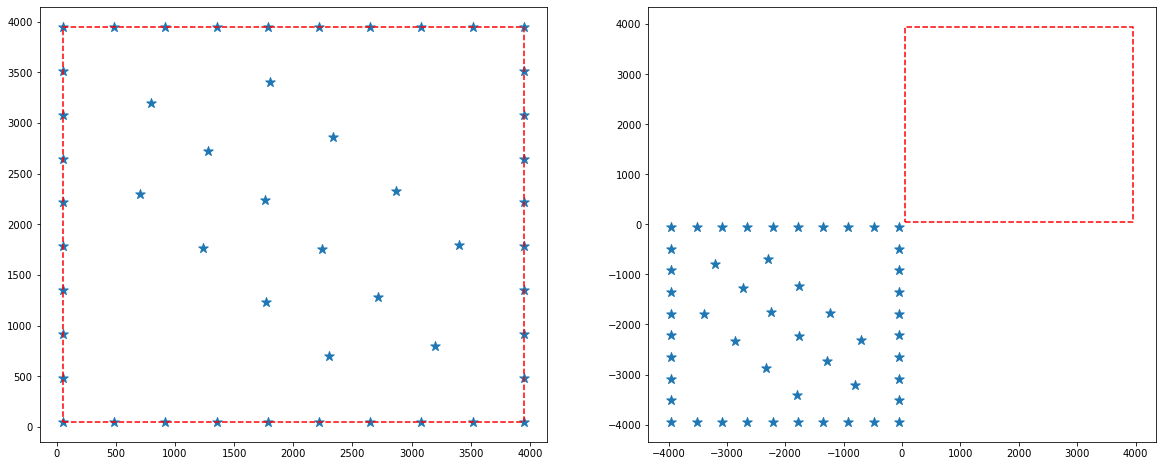

In [12]:
plot_turbines2([array1,rotated_array1])

(50, 2) (50, 2)


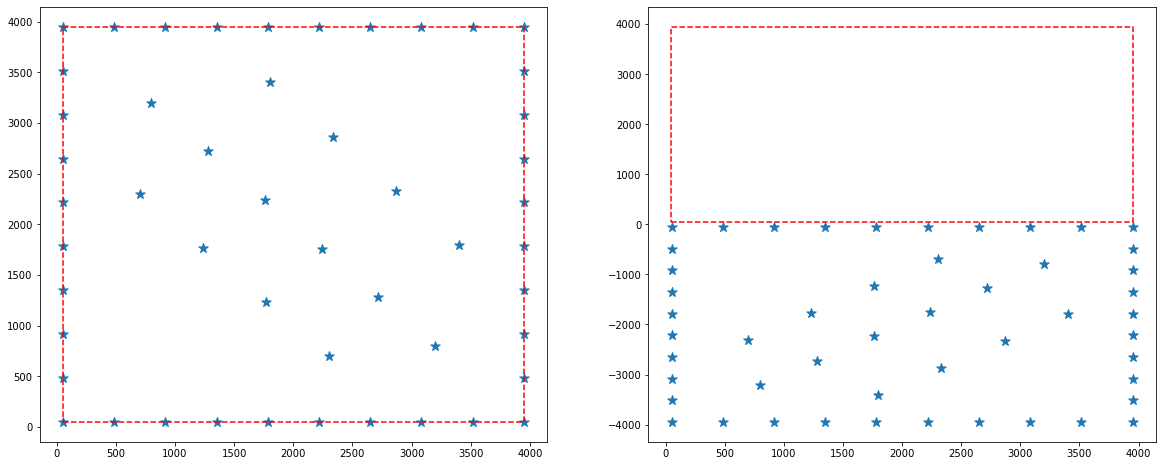

In [13]:
rotated_array1 = rotatedFrame(array1,0)
rotated_array2 = rotatedFrame(array2,0)
print(rotated_array1.shape,rotated_array2.shape)

plot_turbines2([array1,rotated_array1])

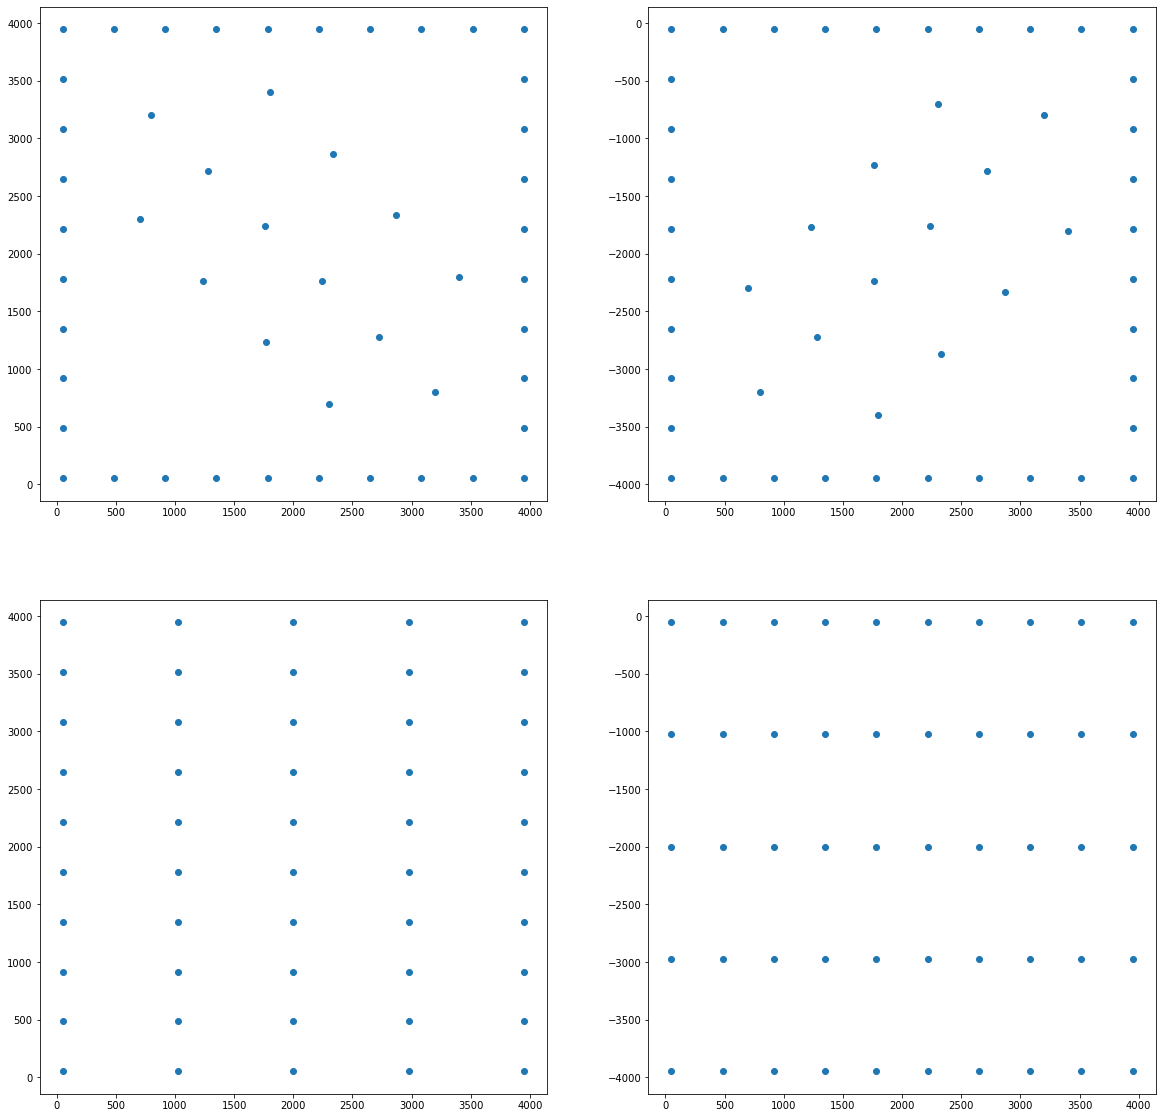

In [14]:
fig,ax = plt.subplots(2,2,figsize = (20,20))
ax[0][0].scatter(array1[:,0],array1[:,1])
ax[0][1].scatter(rotated_array1[:,0],rotated_array1[:,1])
ax[1][0].scatter(array2[:,0],array2[:,1])
ax[1][1].scatter(rotated_array2[:,0],rotated_array2[:,1])

In [15]:
np.roll(np.arange(10, 361, 10, dtype=np.float32),1)

array([360.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350.], dtype=float32)

In [16]:
np.arange(10, 361, 10, dtype=np.float32)

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200., 210., 220.,
       230., 240., 250., 260., 270., 280., 290., 300., 310., 320., 330.,
       340., 350., 360.], dtype=float32)

# AEP

In [17]:
from Farm_Evaluator import loadPowerCurve
power = loadPowerCurve(POWER_CURVE)
print(power.shape)

(501, 3)


# total AEP

In [20]:
from Farm_Evaluator import totalAEP

aep,farm_arr = totalAEP(100,array1,power,prob_array)
aep_2007,farm_arr_2007 = totalAEP(100,array1,power,prob_array_2007)

100%|██████████| 36/36 [00:00<00:00, 119.59it/s]


NameError: name 'fame_pwr' is not defined

In [52]:
print(aep)
print(aep_2007)

1314.0
533.9451979064942


In [57]:
totalAEP(100,array1,power,prob_array)

100%|██████████| 36/36 [00:00<00:00, 118.92it/s]


1314.0